## Importing libraries/data

### Importing Libraries

In [1]:
# For general use
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# For our classifiers
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree
from sklearn import neural_network
from sklearn import preprocessing

# For confusion matrix/data importing
from sklearn import metrics  
from sklearn.datasets import load_digits 

from os import listdir
from os.path import isfile, join

from PIL import Image



### Getting file names

In [2]:
symbols = [str(x) for x in range(10)]+["+", "-", "(", ")", ","]

file_lists = {}
for symbol in symbols:
    mypath =  "img/"+symbol
    file_lists[symbol] =  [mypath+"b/"+f for f in listdir(mypath+"b") if isfile(join(mypath+"b", f))]
    file_lists[symbol] += [mypath+"n/"+f for f in listdir(mypath+"n") if isfile(join(mypath+"n", f))]

    for file_name in file_lists[symbol]:
        if(file_name[-9:] == ".DS_Store"):
            file_lists[symbol].remove(file_name)

### Getting images

In [3]:
image_dict = {}
for symbol in symbols:
    image_dict[symbol] = []
    for file in file_lists[symbol]:
        image = Image.open(file)
        # Scaling image down
        image_dict[symbol].append(image.resize((45, 45)))

In [4]:
images_mono = {}
# Turning images into numerical values representing
#  brightness of each pixel
for symbol in symbols:
    images_mono[symbol] = []
    for i in image_dict[symbol]:
        images_mono[symbol].append(np.asarray( i, dtype="int32" ))

In [5]:
# Reshaping digits
images_shaped = images_mono.copy()

for symbol in symbols:
    for image in range(len(images_shaped[symbol])):
        images_shaped[symbol][image] = images_shaped[symbol][image].reshape(-1, 45**2)

In [6]:
images_shaped["0"][0].shape

(1, 2025)

In [7]:
dfs = []
for symbol in symbols:
    print("Symbol: "+symbol)
    print("Creating DF")
    temp = pd.DataFrame([images_shaped[symbol][i][0] for i in range(len(images_shaped[symbol]))])
#     print("Converting...")
#     temp = temp.apply(lambda x : (x/32).astype(int) )
    temp["class"] = symbol
    dfs.append(temp)
    
df = pd.concat(dfs)


print("Done.")

Symbol: 0
Creating DF
Symbol: 1
Creating DF
Symbol: 2
Creating DF
Symbol: 3
Creating DF
Symbol: 4
Creating DF
Symbol: 5
Creating DF
Symbol: 6
Creating DF
Symbol: 7
Creating DF
Symbol: 8
Creating DF
Symbol: 9
Creating DF
Symbol: +
Creating DF
Symbol: -
Creating DF
Symbol: (
Creating DF
Symbol: )
Creating DF
Symbol: ,
Creating DF
Done.


## Test Train Split

In [8]:
for i in df.iloc[0]:
    print(i)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
88
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224
224
51
154
88
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
100
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
215
239
224
96
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
101
183
211
255
255
228
72
72
72
72
72
72
72
72
72
72
72
72
72
72
72
228
255
255
255
217
101
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
103
213
255
255
205
93
79
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
79
218
255
255
255
141
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
101
213
255
255
255
176


In [9]:
features = [x for x in df]
features.remove("class")

train = df[df.index%2 == 0]
test = df[df.index%2 != 0]

train_X = np.array(train[features].values)
train_y = train["class"].values

test_X = np.array(test[features].values)
test_y = test["class"].values

all_X = np.array(df[features].values)
all_y = df["class"]

In [10]:
all_y

0      0
1      0
2      0
3      0
4      0
      ..
125    ,
126    ,
127    ,
128    ,
129    ,
Name: class, Length: 1618, dtype: object

In [11]:
# plt.imshow(train[122].reshape(45,45), cmap=plt.cm.binary)

## Training classifiers

In [12]:
import pickle

'3'

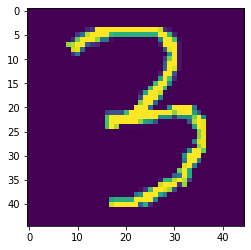

In [13]:
plt.imshow(test_X[170].reshape(45,45))
test_y[170]

In [14]:
KN_scores = []
for i in range(1, 10):
    clf_KN = neighbors.KNeighborsClassifier(n_neighbors=i)
    clf_KN.fit(train_X, train_y)
    KN_scores.append(clf_KN.score(test_X, test_y))

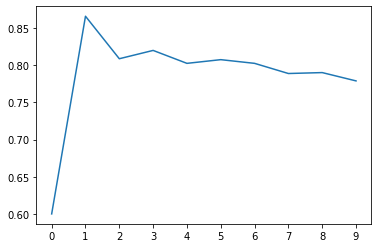

In [15]:
plt.plot([0.6]+KN_scores)
plt.xticks([x for x in range(10)])
plt.show()

In [16]:
clf_KN = neighbors.KNeighborsClassifier(n_neighbors=1)
clf_KN.fit(all_X, all_y)
with open('KN.pk', 'wb') as fout:
    pickle.dump(clf_KN, fout)

### Decision Tree

In [17]:
DT_scores = []
for i in range(3, 30):
    clf_DT = tree.DecisionTreeClassifier(max_depth=i, random_state=42)
    clf_DT.fit(train_X, train_y)
    DT_scores.append(clf_DT.score(test_X, test_y))

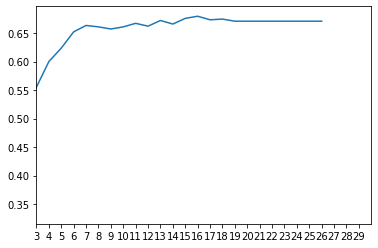

In [18]:
plt.plot(DT_scores)
plt.xticks([x for x in range(3,30)])
plt.xlim((3,30))
plt.show()

In [19]:
clf_DT = tree.DecisionTreeClassifier(max_depth=12, random_state=42)
clf_DT.fit(all_X, all_y)
with open('DT.pk', 'wb') as fout:
    pickle.dump(clf_DT, fout)

### GuassianNB

In [20]:
clf_GA = naive_bayes.GaussianNB()
clf_GA.fit(all_X, all_y)
with open('GA.pk', 'wb') as fout:
    pickle.dump(clf_GA, fout)

### Neural Net

In [21]:
sc = preprocessing.StandardScaler()
sc_train_X = sc.fit_transform(train_X)
sc_test_X  = sc.fit_transform(test_X)
sc_all_X   = sc.fit_transform(all_X)

In [22]:
# Recording scores
sc_NN_scores = []
NN_scores = []
for hid in range(20, 90, 5):
    print(f"fitting and scoring hidden_layer_sizes={hid}...")
    clf_NN = neural_network.MLPClassifier(hidden_layer_sizes=(hid),max_iter=3000, random_state=42)
    clf_NN.fit(train_X, train_y)
    NN_scores.append(clf_NN.score(test_X, test_y))
    
    clf_NN.fit(sc_train_X, train_y)
    sc_NN_scores.append(clf_NN.score(sc_test_X, test_y))

fitting and scoring hidden_layer_sizes=20...
fitting and scoring hidden_layer_sizes=25...
fitting and scoring hidden_layer_sizes=30...
fitting and scoring hidden_layer_sizes=35...
fitting and scoring hidden_layer_sizes=40...
fitting and scoring hidden_layer_sizes=45...
fitting and scoring hidden_layer_sizes=50...
fitting and scoring hidden_layer_sizes=55...
fitting and scoring hidden_layer_sizes=60...
fitting and scoring hidden_layer_sizes=65...
fitting and scoring hidden_layer_sizes=70...
fitting and scoring hidden_layer_sizes=75...
fitting and scoring hidden_layer_sizes=80...
fitting and scoring hidden_layer_sizes=85...


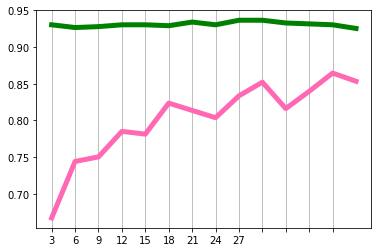

In [23]:
plt.plot(NN_scores, color="hotpink", lw=5)
plt.plot(sc_NN_scores, color="green", lw=5)
plt.xticks([x for x in range(13)], labels=[hid for hid in range(3, 30, 3)])
# plt.xlim((6,40))
plt.grid(axis="x")
plt.show()


In [30]:
clf_NN = neural_network.MLPClassifier(hidden_layer_sizes=(30),max_iter=3000, random_state=42)
clf_NN.fit(all_X, all_y)
with open('NN.pk', 'wb') as fout:
    pickle.dump(clf_NN, fout)

sc_clf_NN = neural_network.MLPClassifier(hidden_layer_sizes=(21),max_iter=3000, random_state=42)
sc_clf_NN.fit(sc_all_X, all_y)
with open('sc_NN.pk', 'wb') as fout:
    pickle.dump(sc_clf_NN, fout)
    


In [25]:
sc_clf_NN.score(sc_all_X, all_y)

0.9993819530284301

In [26]:
# scaled Kneighbors
clf_KN = neighbors.KNeighborsClassifier(n_neighbors=3)
clf_KN.fit(sc_all_X, all_y)
with open('sc_KN.pk', 'wb') as fout:
    pickle.dump(clf_KN, fout)
    

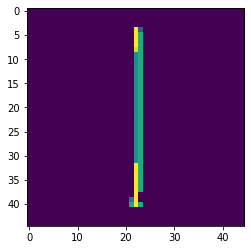

In [27]:
plt.imshow(all_X[122].reshape(45,45))

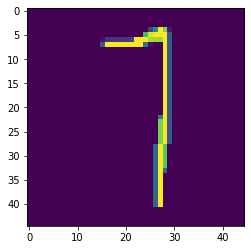

In [28]:
plt.imshow(all_X[786].reshape(45,45))

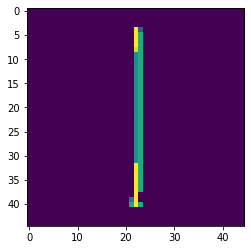

In [29]:
plt.imshow(all_X[122].reshape(45,45))